In [289]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage.io import imread, imshow
from src.utils.keypoints_filter import mean_distance_filter
from src.utils.visualize import plot_voronoi
import cv2 as cv
import pandas as pd
JSON_EXT = ".json"
JPG_EXT = ".jpg"
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120
color = {
        1:"brown",
        2:"blue",
        3:"green",
        4:"red"
    }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [290]:
def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)

def plot_keypoints(img):
    sift = cv.SIFT_create(nOctaveLayers=50,edgeThreshold=10,sigma=1.6)
    kp = sift.detect(img,None)
    #img=cv.drawKeypoints(img,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img)
    plt.show()
    return kp

def plot_labels(df):
    for idx , row in df.iterrows():
            x = row[0]; y = row[1]; label = row[2]
            plt.plot(x, y, marker='^', color=color[label])
def keypoint_to_dict(keypoint):
    keypoint_dict =  {
        'size':keypoint.size,
        'response':keypoint.response,
        'angle':keypoint.angle,
        'pos':keypoint.pt,
        'octave':keypoint.octave
        
    }
    return keypoint_dict

In [291]:
img_name = r"p1_0299_6"
train_set = r"../data/Ki67/SHIDC-B-Ki-67/Train"
path_json=os.path.join(train_set,img_name+JSON_EXT)
path = os.path.join(train_set,img_name+JPG_EXT)
df= pd.read_json(path_json)

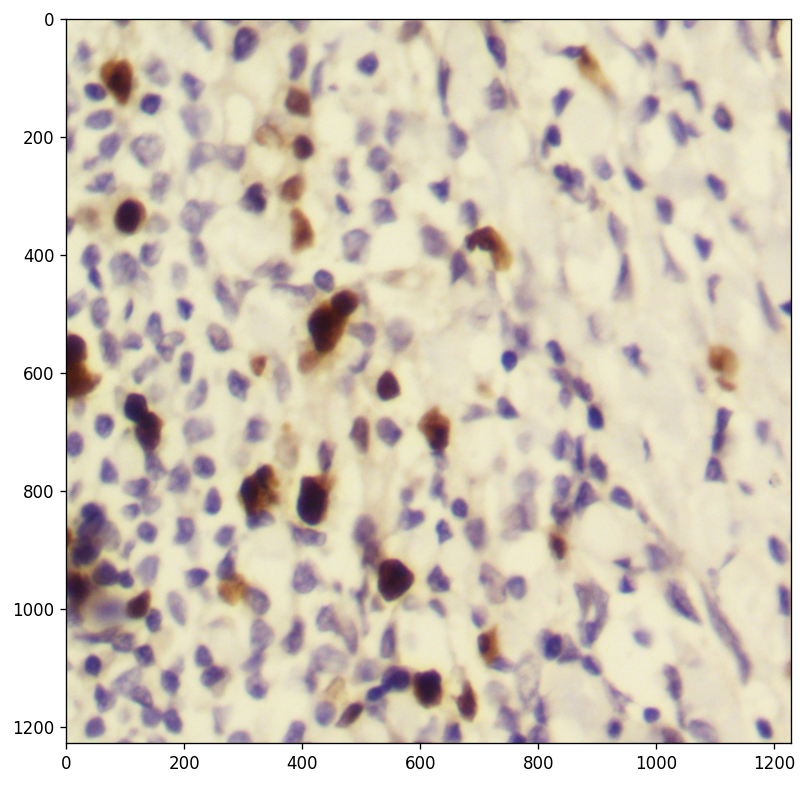

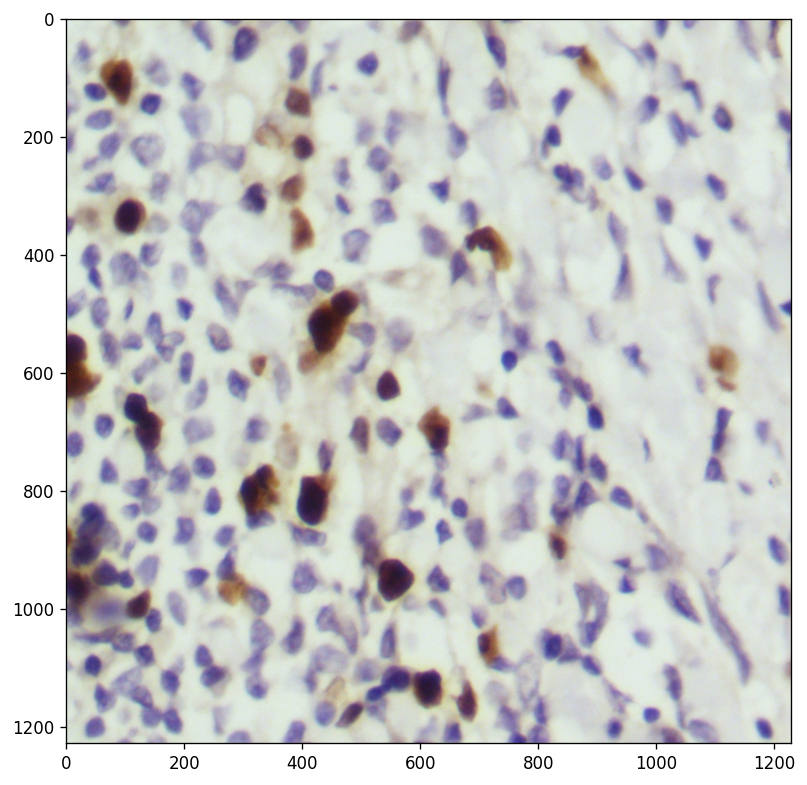

2068

In [292]:
img_raw = mpimg.imread(path)
img_grey = grey_world(img_raw)
plt.imshow(img_grey)
kp1 = plot_keypoints(img_raw)
kp2 = plot_keypoints(img_grey)
len(kp1)

In [293]:
key_dict = [keypoint_to_dict(kp) for kp in kp1]

In [294]:
keys = pd.DataFrame(key_dict)
keys

size  response       angle  \
0     12.603889  0.001584   88.676331   
1     12.477012  0.000944  346.147186   
2     12.357276  0.000953  267.703033   
3     11.883632  0.000815  213.351151   
4     12.685279  0.001151  191.951538   
...         ...       ...         ...   
2063  23.288200  0.003592  355.337616   
2064  24.185579  0.002317  324.100189   
2065  12.876802  0.001110  340.822723   
2066  11.593421  0.000880  332.241058   
2067  12.505309  0.001108  131.673569   

                                           pos    octave  
0        (9.28372859954834, 650.4340209960938)   6435073  
1      (10.381731986999512, 92.95044708251953)  10956801  
2       (11.19807243347168, 931.8134155273438)  16068353  
3           (12.528348922729492, 891.66015625)   2370817  
4      (13.055984497070312, 53.43653106689453)  14233857  
...                                        ...       ...  
2063   (1202.8822021484375, 58.46204376220703)  11283202  
2064     (1204.50830078125, 476.5470886230469)   6696450  
2065      (1206.235595703125, 722.96728515625)  15610369  
2066      (1207.0966796875, 784.4193115234375)   5974785  
2067  (1212.3636474609375, 1015.9586181640625)  13709313  

[2068 rows x 5 columns]

In [295]:
filtered_keys= list(keys[keys.response>= 0.0023].pos.values)
type(filtered_keys)

list

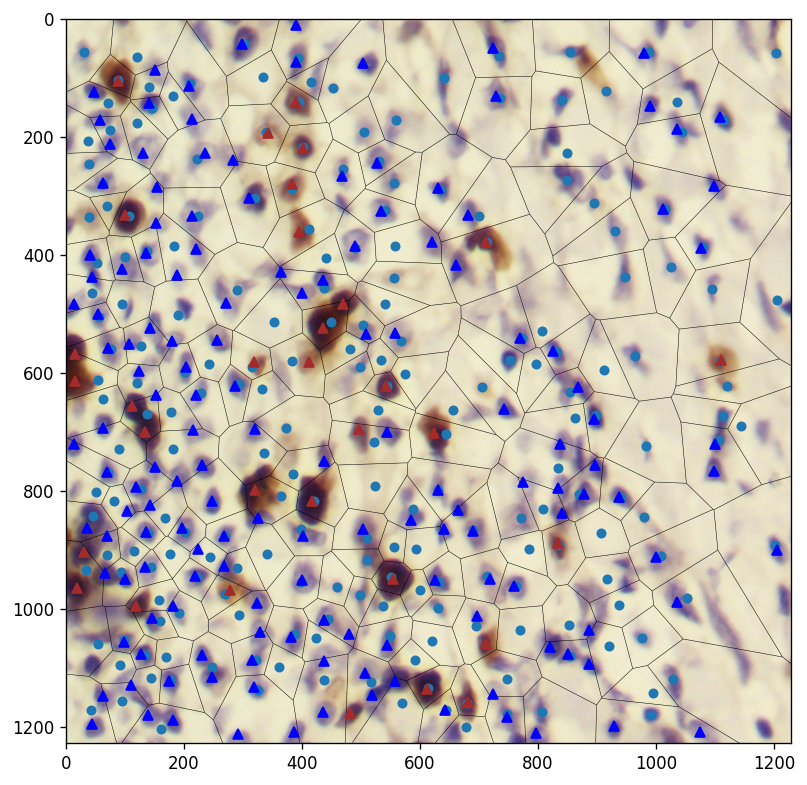

In [299]:
vor = Voronoi(mean_distance_filter(filtered_keys,min_distance=33))
plot_voronoi(vor,img_raw,points_size=10,show_points=True,show_verticles=False,line_width=0.3)
plot_labels(df)

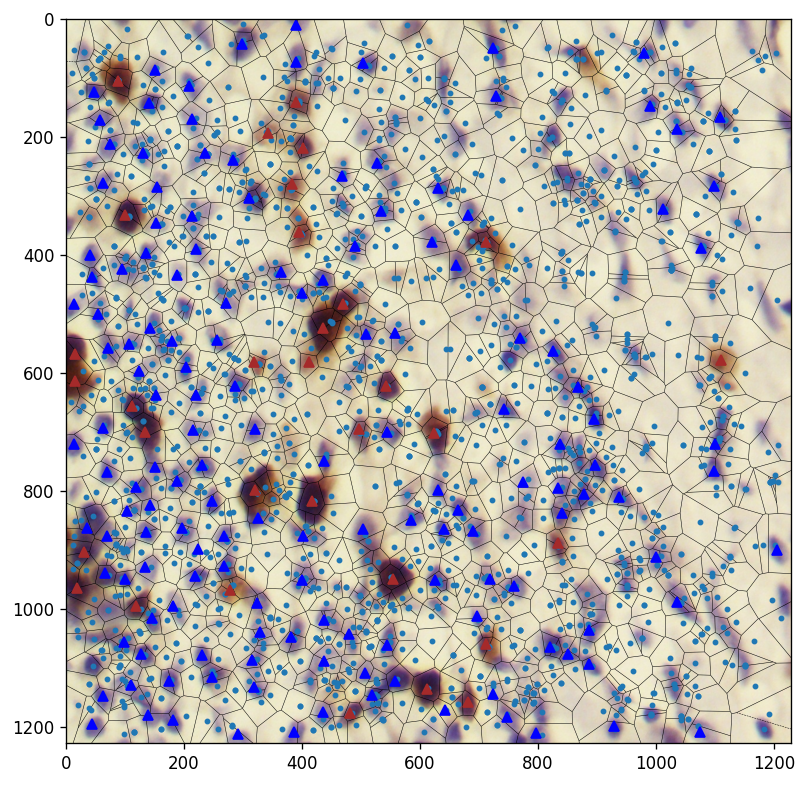

In [301]:
vor = Voronoi([kp.pt for kp in kp1])
plot_voronoi(vor,img_raw,points_size=5,show_points=True,show_verticles=False,line_width=0.3)
plot_labels(df)

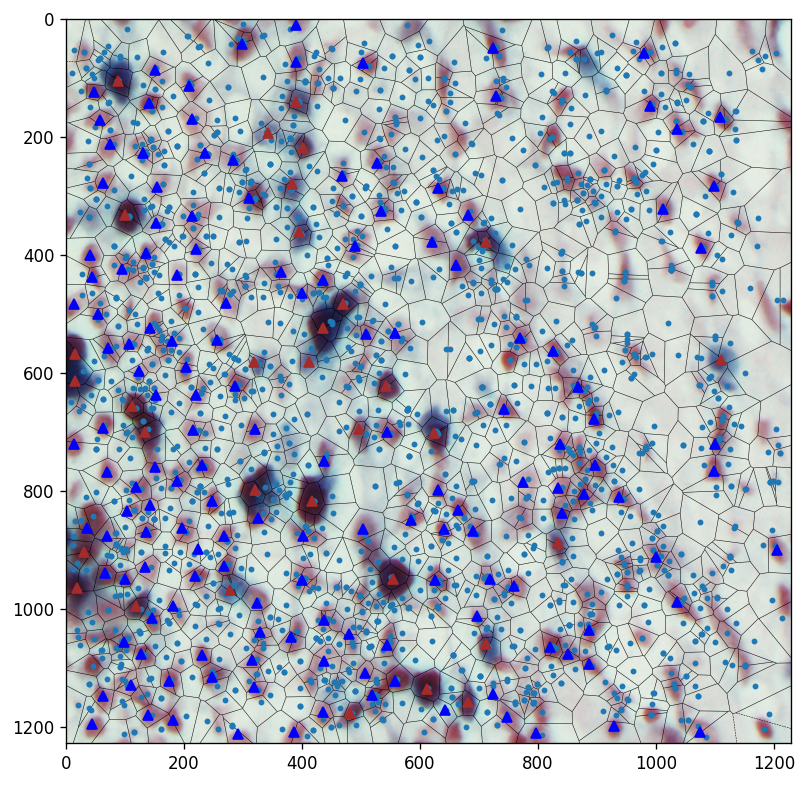

In [298]:
vor = Voronoi([kp.pt for kp in kp2])
plot_voronoi(vor,img_cv,points_size=5,show_points=True,show_verticles=False,line_width=0.3)
plot_labels(df)

[<KeyPoint 000001CFD2724360>,
 <KeyPoint 000001CFC87557B0>,
 <KeyPoint 000001CFC8755270>]

In [280]:
from scipy.spatial.distance import cdist
xy = list(zip(df.x,df.y))
d=cdist(xy,xy)

In [283]:
d=d.flatten()
d.sort()

In [285]:
d[d>0]

array([  33.24154028,   33.24154028,   34.20526275, ..., 1479.46274032,
       1493.24646325, 1493.24646325])